# k-Fold Cross Validation

K-Fold cross-validation is a technique used to evaluate the performance of a machine learning model without the usage of a testing set. It involves dividing your dataset into k equally sized parts, or *folds*. The model is trained and tested k times, with each fold taking turns as the test set while the others are used for training. This process helps assess how well the model type suits the data. The  performance metric we use is generally an average (or some other aggregate) of the results from all k iterations.

In [1]:
# Standard imports
import matplotlib.pyplot as plt
import numpy as np

# Dataset 
from sklearn.datasets import load_diabetes

# For computing k-fold cross validation for a linear regression model
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In this example, we are using the Diabetes dataset available through Sci-Kit Learn. This dataset consists of ten baseline variables (age, sex, BMI, average blood pressure, and six blood serum measurements) and a target variable that represents a quantitative measure of disease progression one year after baseline.

Here are the key details of the diabetes dataset:

- Number of Instances: 442
- Number of Features: 10

It is common that datasets involving human subjects are generally small; often too small for a test-train split of the dataset. k-Fold cross validation is a technique perfect for evaluating how well a technique is suited to the data. 

In [2]:
# Load the diabetes dataset as an example
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [3]:
# Define number of folds
k = 12

# Initialize a KFold object
kf = KFold(n_splits=k)

# Initialize lists to store R-squared scores and MSE for each fold
r2_scores = []
mse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train a model (e.g., Linear Regression)
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    r2_scores.append(r2)
    mse_scores.append(mse)

# Calculate and store the mean R-squared and mean MSE scores for this value of k
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)

print(f"Mean MSE Score: {mean_mse}")
print(f"Mean R^2 Score: {mean_r2}")

Mean MSE Score: 3001.497919477381
Mean R^2 Score: 0.4551928579448146


Here, we plot the results of each individual fold. This step is not necessary but can help us see what's going on within these folds.

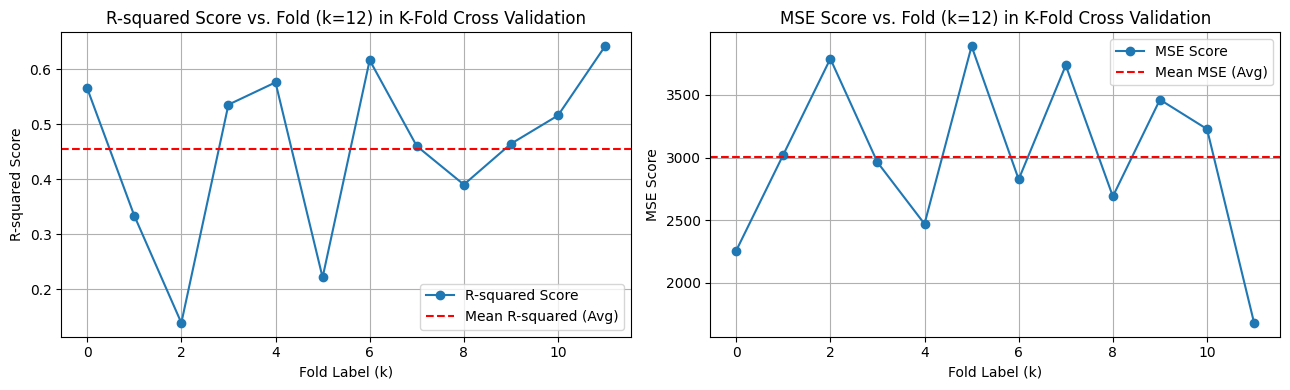

In [4]:
# Plot the mean R-squared scores versus the number of folds (k)
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(list(range(k)), r2_scores, marker='o', linestyle='-', label='R-squared Score')
plt.axhline(y=np.mean(mean_r2), color='r', linestyle='--', label='Mean R-squared (Avg)')
plt.xlabel('Fold Label (k)')
plt.ylabel('R-squared Score')
plt.title(f'R-squared Score vs. Fold (k={k}) in K-Fold Cross Validation')
plt.grid(True)
plt.legend()

# Plot the mean MSE scores versus the number of folds (k)
plt.subplot(1, 2, 2)
plt.plot(list(range(k)), mse_scores, marker='o', linestyle='-', label='MSE Score')
plt.axhline(y=np.mean(mean_mse), color='r', linestyle='--', label='Mean MSE (Avg)')
plt.xlabel('Fold Label (k)')
plt.ylabel('MSE Score')
plt.title(f'MSE Score vs. Fold (k={k}) in K-Fold Cross Validation')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Finally, one thing that students often confuse is how we get the final model from this technique. The answer is, we don't! Instead, we train on the entire dataset and let the k-fold cross validation aggregate score rate the quality of our model. This score is a reflection of how well the technique matches with the dataset, but is not, for example, the actual MSE or $R^2$ scores. We don't know what these are without a testing set. 

In [5]:
model = LinearRegression()
model.fit(X, y)

print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
Model Intercept: 152.13348416289597
